# Practical example

## Importing the relevant libraries

In [205]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [206]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [207]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [208]:
# data = raw_data.drop(['Model'],axis=1)
data = raw_data.copy()
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Dealing with missing values

In [209]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [210]:
data_no_mv = data.dropna(axis=0)

In [211]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38,NaN
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Exploring the PDFs

/tmp/ipykernel_13462/216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

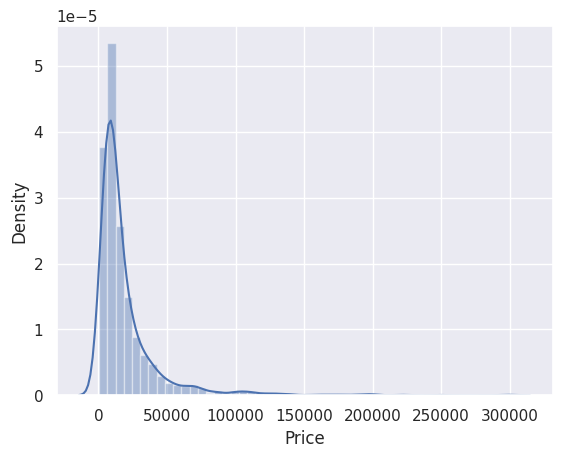

In [212]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [213]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
regression = smf.ols('Price ~ Mileage+EngineV', data=data_no_mv).fit()

In [214]:
# x = regression.outlier_test()
# x

,student_resid,unadj_p,bonf(p)
0,-0.07,0.94,1.00
1,0.86,0.39,1.00
2,0.71,0.48,1.00
3,0.53,0.60,1.00
4,-0.27,0.79,1.00
...,...,...,...
4339,-0.73,0.47,1.00
4340,3.85,0.00,0.49
4341,-1.44,0.15,1.00
4342,-0.34,0.74,1.00


In [215]:
# print('Bad data points (bonf(p) < 0.05):')

# outliers = x[x['bonf(p)'] < 0.05].index.values
# outliers

Bad data points (bonf(p) < 0.05):


array([   5,  131,  173,  348,  438,  594,  602,  993, 1304, 1644, 1658,
       1728, 1752, 1885, 1914, 2011, 2130, 2188, 2212, 2226, 2243, 2521,
       2550, 2607, 2657, 2744, 3164, 3167, 3244, 3330, 3625, 3636, 3645,
       3928, 4044, 4101, 4318])

In [216]:
# data_no_mv['Price'][outliers]

5      199999.00
131    195000.00
173    169000.00
348    199999.00
438    195000.00
594    164500.00
602    199999.00
993    173333.00
1304   154999.00
1644   177000.00
1658   144900.00
1728   300000.00
1752   169000.00
1885   139000.00
1914   137000.00
2011   222000.00
2130   177777.00
2188   249999.00
2212   138000.00
2226   140000.00
2243   250000.00
2521   195000.00
2550   185555.00
2607    68700.00
2657   189999.00
2744   160000.00
3164   295000.00
3167   135555.00
3244   199999.00
3330   159999.00
3625    47700.00
3636   187555.00
3645   219900.00
3928   200000.00
4044   219900.00
4101   295000.00
4318   300000.00
Name: Price, dtype: float64

In [218]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
# print(data_no_mv.describe(include='all'))
# data_1 = data_no_mv.drop(index = outliers)
data_1.describe(include='all')

             Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4025   4025.00   4025  4025.00  4025.00        4025   
unique           7       NaN      6      NaN      NaN           4   
top     Volkswagen       NaN  sedan      NaN      NaN      Diesel   
freq           880       NaN   1534      NaN      NaN        1861   
mean           NaN  19552.31    NaN   163.57     2.76         NaN   
std            NaN  25815.73    NaN   103.39     4.94         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    90.00     1.80         NaN   
50%            NaN  11500.00    NaN   158.00     2.20         NaN   
75%            NaN  21900.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year    Model  
count          4025 4025.00     4025  
unique            2     NaN      306  
top             yes     NaN  E-Class  
freq           

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3988,3988.00,3988,3988.00,3988.00,3988,3988,3988.00,3988
unique,7,NaN,6,NaN,NaN,4,2,NaN,303
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1529,NaN,NaN,1854,3617,NaN,188
mean,NaN,17989.39,NaN,164.51,2.75,NaN,NaN,2006.30,NaN
std,NaN,19458.64,NaN,101.57,4.95,NaN,NaN,6.68,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6996.75,NaN,92.75,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11426.99,NaN,160.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21200.00,NaN,230.00,3.00,NaN,NaN,2011.00,NaN


/tmp/ipykernel_13462/2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

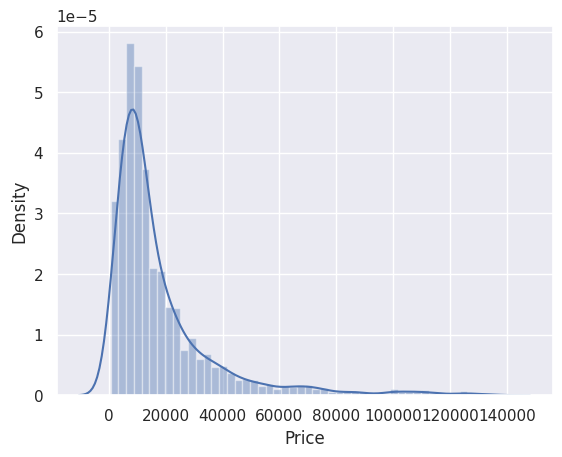

In [219]:
sns.distplot(data_1['Price'])

/tmp/ipykernel_13462/534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<AxesSubplot: xlabel='Mileage', ylabel='Density'>

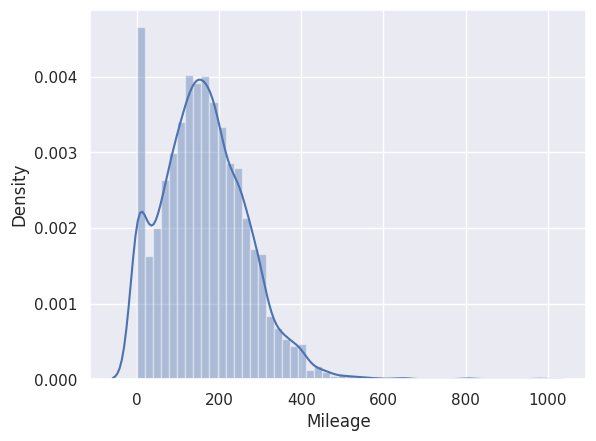

In [220]:
sns.distplot(data_no_mv['Mileage'])

In [221]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

/tmp/ipykernel_13462/1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<AxesSubplot: xlabel='Mileage', ylabel='Density'>

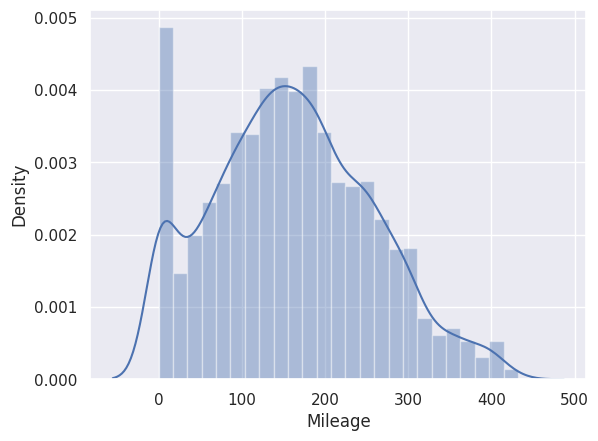

In [222]:
sns.distplot(data_2['Mileage'])

/tmp/ipykernel_13462/823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<AxesSubplot: xlabel='EngineV', ylabel='Density'>

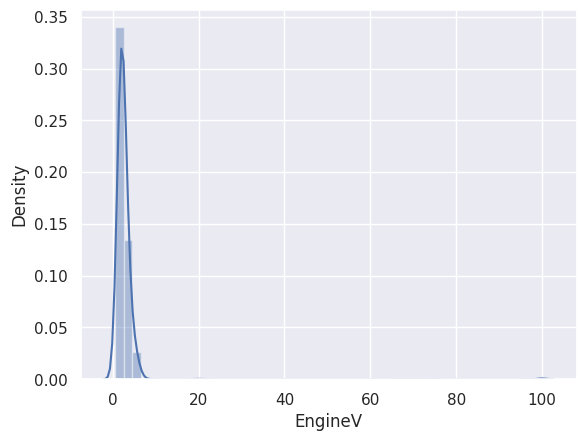

In [223]:
sns.distplot(data_no_mv['EngineV'])

In [224]:
data_3 = data_2[data_2['EngineV']<6.5]

/tmp/ipykernel_13462/1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<AxesSubplot: xlabel='EngineV', ylabel='Density'>

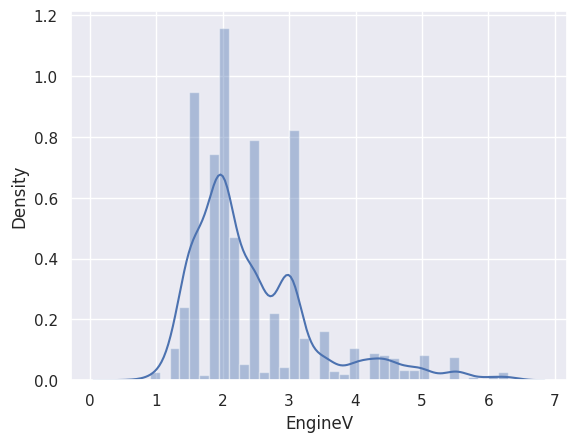

In [225]:
sns.distplot(data_3['EngineV'])

/tmp/ipykernel_13462/534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<AxesSubplot: xlabel='Year', ylabel='Density'>

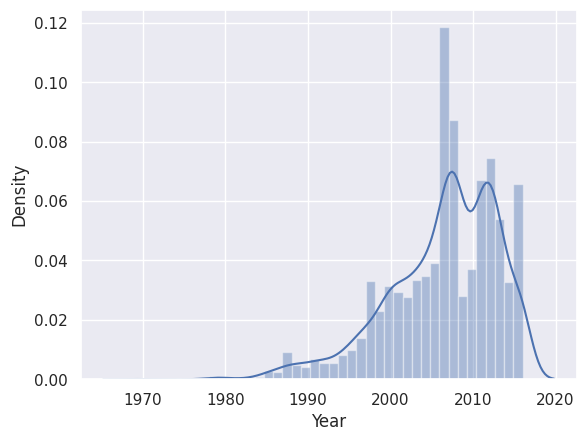

In [226]:
sns.distplot(data_no_mv['Year'])

In [227]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/tmp/ipykernel_13462/2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<AxesSubplot: xlabel='Year', ylabel='Density'>

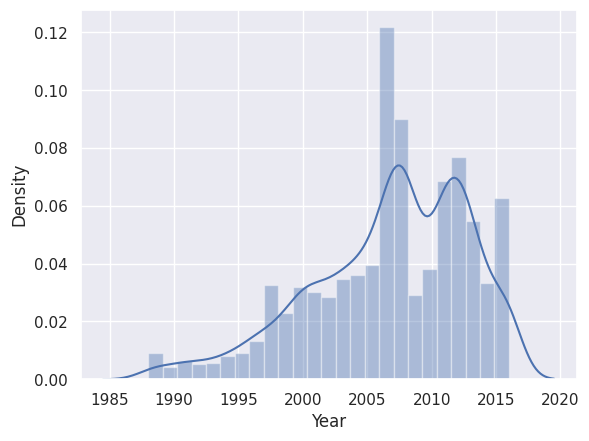

In [228]:
sns.distplot(data_4['Year'])

In [229]:
data_cleaned = data_4.reset_index(drop=True)

In [230]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3871,3871.00,3871,3871.00,3871.00,3871,3871,3871.00,3871
unique,7,NaN,6,NaN,NaN,4,2,NaN,292
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,847,NaN,1467,NaN,NaN,1808,3510,NaN,181
mean,NaN,18378.60,NaN,160.16,2.45,NaN,NaN,2006.73,NaN
std,NaN,19596.74,NaN,95.57,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,90.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21800.00,NaN,225.00,3.00,NaN,NaN,2012.00,NaN


## Checking the OLS assumptions

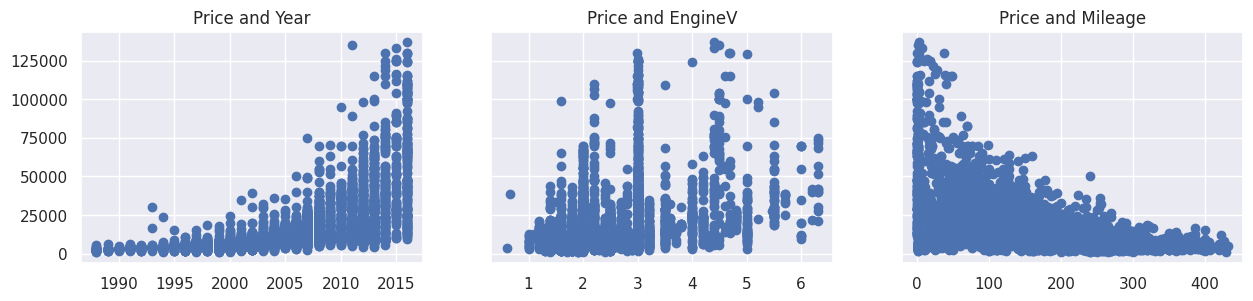

In [231]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

/tmp/ipykernel_13462/462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

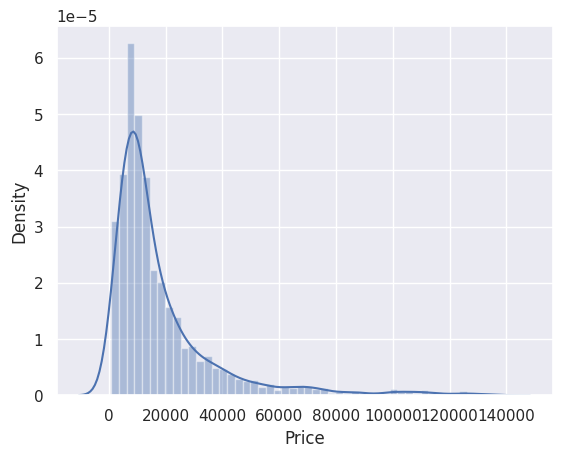

In [232]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [233]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4,9.81
...,...,...,...,...,...,...,...,...,...,...
3866,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter),9.35
3867,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla,9.79
3868,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350,11.74
3869,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535,8.78


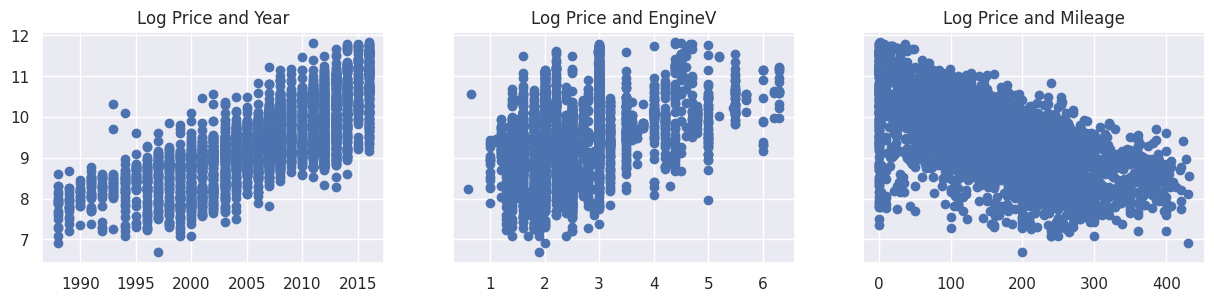

In [234]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [235]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [236]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [238]:
vif

,VIF,features
0,3.78,Mileage
1,10.37,Year
2,7.64,EngineV


In [239]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [240]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [241]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.97,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.81,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rearrange a bit

In [242]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [243]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [244]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.34,277,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.97,427,2.90,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.50,358,5.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.04,240,4.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.81,120,2.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression model

### Declare the inputs and the targets

In [245]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop('log_price', axis=1)

In [246]:
from sklearn.feature_selection import f_regression
pvals = f_regression(inputs, targets)[1].round(3)
pvals[pvals>0.05,]
not_sig_col = np.where(pvals> 0.05)
inputs.drop(inputs.columns[not_sig_col], axis=1, inplace=True)

### Scale the data

In [247]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# inputs.columns.values
# inputs[['Mileage', 'EngineV']]
scaler.fit(inputs[['Mileage', 'EngineV']])

StandardScaler()

In [248]:
# not recommended to scale dummy vars.
# in ML we usually don't care as scaling has no effect on the predictive power of dummies
# once scalsed, though, they lose all their dummy meaning
input_scaled = scaler.transform(inputs[['Mileage', 'EngineV']])

input_scaled
inp_ndarray = inputs.drop(['Mileage', 'EngineV'], axis=1).to_numpy()
input_scaled = np.concatenate((input_scaled, inp_ndarray), axis=1)

### Train Test Split

In [249]:
type(input_scaled)

numpy.ndarray

In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=365)

In [251]:
# x type is ndarray
# y type is dataframe
# when we determined the target and inputs, both where dataframes
    # targets was a dataframe series
    # inputs is a dataframe
# during the scaling, inputs dataframe transformed into ndarray
# that means targets (ytrain and ytest) have there indices maintained
print(x_train)
print(x_test)
print(y_train.head())
print(y_test.head())

[[ 1.30637138  2.04577428  1.         ...  0.          0.
   0.        ]
 [-0.68193474  1.10007237  0.         ...  0.          0.
   0.        ]
 [-0.13776675 -0.89640945  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.20757063 -1.10656543  0.         ...  0.          0.
   0.        ]
 [ 0.73080908  0.04929246  0.         ...  0.          0.
   0.        ]
 [-0.55635751 -0.26594151  0.         ...  0.          0.
   0.        ]]
[[-0.70286428  0.57468241  0.         ...  0.          0.
   0.        ]
 [ 1.04475215  0.57468241  0.         ...  0.          0.
   0.        ]
 [ 0.88778062  0.57468241  1.         ...  0.          0.
   0.        ]
 ...
 [ 1.45287815  0.04929246  0.         ...  0.          0.
   0.        ]
 [ 0.41686601 -0.47609749  0.         ...  0.          0.
   0.        ]
 [-1.6760878   0.57468241  0.         ...  0.          0.
   0.        ]]
266     8.91
922    10.24
1942    9.02
1257    8.76
1927    8.72
Name: log_price, dtype: float64
2110   9.54
234

### Create the regression

In [252]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### check the regression model
* one way is by scatter plot the target and predicted data
* another way is by plotting the distribution of residuals (difference between target and prediction)

In [253]:
y_hat = lm.predict(x_train)

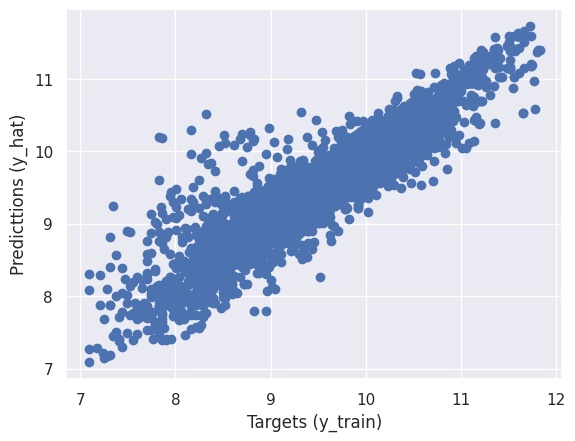

In [254]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predicttions (y_hat)')
plt.show()

In [255]:
r2 = lm.score(x_train, y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8130593199871823

Text(0.5, 1.0, 'Residuals PDF')

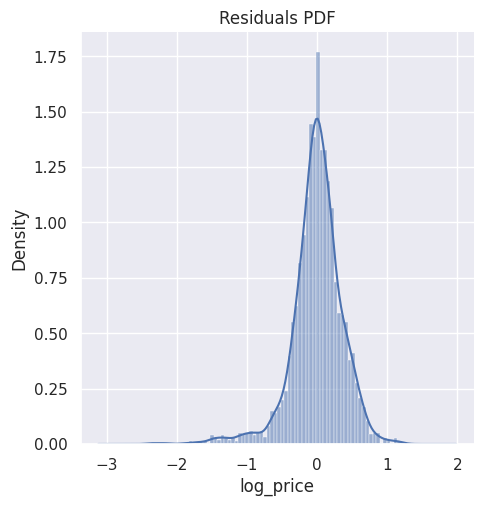

In [256]:
# the distribution should be normally distributed with mean of zero
# from the plot we can see it is a bit right-skewd. there is a longer tail on the negative side
# that means, the model is over-estimating the prices for certain observations
# as we don't see similar tail on the right-side, we can conclude that predictions rarely under-estimate the target
sns.displot(y_train-y_hat, kde=True, kde_kws=dict(cut=10), stat = 'density')
plt.title('Residuals PDF')

### Finding the weights and bias

In [257]:
lm_summary = pd.DataFrame(data=inputs.columns.values, columns=['Features'])
lm_summary['Wights'] = lm.coef_
lm_summary

,Features,Wights
0,Mileage,-0.37
1,EngineV,0.09
2,Brand_BMW,-0.07
3,Brand_Mercedes-Benz,-0.12
4,Brand_Mitsubishi,-0.55
...,...,...
126,Model_X5,0.30
127,Model_X5 M,0.80
128,Model_X6,0.50
129,Model_X6 M,0.75


In [258]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [259]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

### Testing

In [260]:
y_hat_test = lm.predict(x_test)

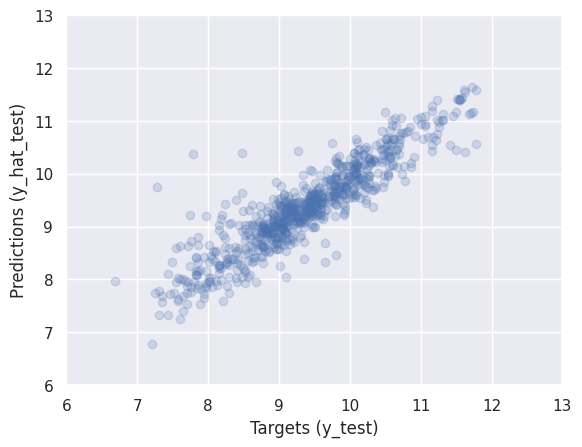

In [261]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [262]:
y_hat_test.shape
# sns.displot(y_test-y_hat_test, kde=True, kde_kws=dict(cut=10), stat = 'density')
# plt.title('Residuals PDF'

(775,)

### Confirm the model performance

In [263]:
df_pf = pd.DataFrame(data=np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()


/tmp/ipykernel_13462/4197373849.py:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(data=np.exp(y_hat_test), columns=['Prediction'])


,Prediction
0,10974.40
1,12301.63
2,9356.95
3,8274.44
4,7209.76


In [264]:
# the index is preserved during split
# panda tries to match the indices between the two dataframes
# but I don't understand why it is correct to reset the index
# I mean why index zero in y_hat can be matched with resetted index zero of y_test.
# ANS: because y_hat is created with the same order as the original y_test regardless of its indexing.
# then we create a new dataframe with index 0 with the new y_hat data
# so, we have to reset the y_test to make them match!
y_test = y_test.reset_index(drop=True)

In [265]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10974.40,13900.00
1,12301.63,8200.00
2,9356.95,15000.00
3,8274.44,5650.00
4,7209.76,8800.00
...,...,...
770,6165.64,5900.00
771,53460.33,51500.00
772,7249.53,9800.00
773,8285.70,6000.00


In [266]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.abs(df_pf['Residuals']/df_pf['Target']*100)

* The minimum difference in percentages is 0.06%. So the output was spot on. 
* The maximum difference in percentages, however, is pretty off mark.
* for upto 75% of the observations, the percentage difference is relatively small (about 39%) comapred to the max
    * that means there are a small number of observations that create such problem in the model
    * it might be due to missing variable (input)
    * it also could be that they are outliers
    * or the transformation is not good enough thus we need to use a different kind of transformation

In [267]:
df_pf.describe()

,Prediction,Target,Residuals,Difference%
count,775.00,775.00,775.00,775.00
mean,inf,18157.72,-inf,inf
std,NaN,20454.22,NaN,NaN
min,876.51,800.00,-inf,0.05
25%,7167.21,6700.00,-1672.90,9.06
50%,11404.49,11400.00,149.02,19.08
75%,19842.91,21850.00,2514.89,36.17
max,inf,129999.00,90934.60,inf


In [268]:
pd.options.display.max_rows = 100
# pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# print(df_pf.sort_values(by=['Difference%']).head(5))
print(df_pf.sort_values(by=['Difference%']).tail(80))

     Prediction    Target  Residuals  Difference%
215     7787.05   4999.00   -2788.05        55.77
247    27911.44  17900.00  -10011.44        55.93
85      7496.70   4800.00   -2696.70        56.18
582    14411.50   9200.00   -5211.50        56.65
724     8323.73   5300.00   -3023.73        57.05
186    37716.21  90999.00   53282.79        58.55
697     4125.91   2600.00   -1525.91        58.69
455    19251.91  47777.00   28525.09        59.70
703    12458.67   7800.00   -4658.67        59.73
200     5119.97   3200.00   -1919.97        60.00
269     2402.57   1500.00    -902.57        60.17
170    12998.64   8100.00   -4898.64        60.48
407    10943.99   6799.00   -4144.99        60.96
106    11777.38  30500.00   18722.62        61.39
141     5972.52  15500.00    9527.48        61.47
680     4425.82  11600.00    7174.18        61.85
387     4541.49   2800.00   -1741.49        62.20
705    10251.24   6300.00   -3951.24        62.72
235    30967.67  18900.00  -12067.67        63.85
